<a href="https://colab.research.google.com/github/priti378/customer_satisfaction_prediction/blob/main/customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas

In [1]:
import numpy as np
import pandas as pd

load the csv file

In [3]:
df = pd.read_csv("customer_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.shape

(8469, 17)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

since first 3 columns have no role in customer rating prediction . so, remove it

In [6]:
df = df.drop(['Ticket ID', 'Customer Name', 'Customer Email'], axis=1)

In [7]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


columns like resolution,first response time , time to resolution , customer satisfaction Rating has missing values

1. Handle missing values

To check whether there is inf or -inf in any column

In [8]:
import numpy as np

# Check for inf or -inf in the entire DataFrame
inf_check = np.isinf(df.select_dtypes(include=[np.number])).any()

print("Columns with inf or -inf values:")
print(inf_check[inf_check == True])

Columns with inf or -inf values:
Series([], dtype: bool)


Replace inf,-inf to NaN if any inf or -inf detected. here there is no such values . in case there are such values. Replace them to NaN as mentioned below

In [9]:
df.replace([np.inf,-np.inf],np.nan, inplace=True)

no change would be there as no inf or -inf values

In [10]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Age                  8469 non-null   int64  
 1   Customer Gender               8469 non-null   object 
 2   Product Purchased             8469 non-null   object 
 3   Date of Purchase              8469 non-null   object 
 4   Ticket Type                   8469 non-null   object 
 5   Ticket Subject                8469 non-null   object 
 6   Ticket Description            8469 non-null   object 
 7   Ticket Status                 8469 non-null   object 
 8   Resolution                    2769 non-null   object 
 9   Ticket Priority               8469 non-null   object 
 10  Ticket Channel                8469 non-null   object 
 11  First Response Time           5650 non-null   object 
 12  Time to Resolution            2769 non-null   object 
 13  Cus

In [12]:
df.isnull().sum()

,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0
Ticket Status,0
Resolution,5700
Ticket Priority,0


 Drop rows where target (Customer Satisfaction Rating) or resolution is missing or fill these with mean

i am filling these with mean

In [13]:
## Handle Missing Values
df['Resolution'] = df['Resolution'].fillna("No Resolution")
mode_rating = df['Customer Satisfaction Rating'].mode()[0]
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(mode_rating)

In [14]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Social media,2023-06-01 12:15:36,NaN,3.0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Chat,2023-06-01 16:45:38,NaN,3.0
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Age                  8469 non-null   int64  
 1   Customer Gender               8469 non-null   object 
 2   Product Purchased             8469 non-null   object 
 3   Date of Purchase              8469 non-null   object 
 4   Ticket Type                   8469 non-null   object 
 5   Ticket Subject                8469 non-null   object 
 6   Ticket Description            8469 non-null   object 
 7   Ticket Status                 8469 non-null   object 
 8   Resolution                    8469 non-null   object 
 9   Ticket Priority               8469 non-null   object 
 10  Ticket Channel                8469 non-null   object 
 11  First Response Time           5650 non-null   object 
 12  Time to Resolution            2769 non-null   object 
 13  Cus

In [16]:
df.isnull().sum()

,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0
Ticket Status,0
Resolution,0
Ticket Priority,0


In [17]:
df.duplicated().sum() #shows no duplicate rows

np.int64(0)

In [18]:
df.shape

(8469, 14)

convert Date fields

In [19]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
#Ensures all three columns are in proper datetime format.

#Any invalid or missing values are safely set to NaT instead of raising errors.

In [20]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Social media,2023-06-01 12:15:36,NaT,3.0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Chat,2023-06-01 16:45:38,NaT,3.0
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [21]:
df.info()#date of purchase, first response time andtime to resolution are converted from object type to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Age                  8469 non-null   int64         
 1   Customer Gender               8469 non-null   object        
 2   Product Purchased             8469 non-null   object        
 3   Date of Purchase              8469 non-null   datetime64[ns]
 4   Ticket Type                   8469 non-null   object        
 5   Ticket Subject                8469 non-null   object        
 6   Ticket Description            8469 non-null   object        
 7   Ticket Status                 8469 non-null   object        
 8   Resolution                    8469 non-null   object        
 9   Ticket Priority               8469 non-null   object        
 10  Ticket Channel                8469 non-null   object        
 11  First Response Time           

#Check for parsing issues (NaT values):

check if there is any missing value

In [22]:
print("Missing 'Date of Purchase':", df['Date of Purchase'].isna().sum())
print("Missing 'First Response Time':", df['First Response Time'].isna().sum())
print("Missing 'Time to Resolution':", df['Time to Resolution'].isna().sum())


Missing 'Date of Purchase': 0
Missing 'First Response Time': 2819
Missing 'Time to Resolution': 5700


'Date of Purchase' is fully populated — great.

'First Response Time' and 'Time to Resolution' have substantial missing data, especially the latter.

Drop rows with missing timestamps (optional but recommended before feature engineering):

In [23]:
#df.dropna(subset=['Date of Purchase', 'First Response Time', 'Time to Resolution'], inplace=True)


In [ ]:
#f.shape

3. Feature Engineering

Create new features: Response Delay & Resolution Time (in hours)

In [24]:
# Example: Time taken to respond
df['Response Delay'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600  # in hours

# Example: Time taken to resolve
df['Resolution Time'] = (df['Time to Resolution'] - df['Date of Purchase']).dt.total_seconds() / 3600  # in hours

In [25]:
print("Missing Response Delay:", df['Response Delay'].isna().sum())
print("Missing Resolution Time:", df['Resolution Time'].isna().sum())


Missing Response Delay: 2819
Missing Resolution Time: 5700


In [26]:
# Drop 'Resolution Time' due to excessive missing values
df = df.drop('Resolution Time', axis=1)

# Impute missing values in 'Response Delay' using the median
df['Response Delay'] = df['Response Delay'].fillna(df['Response Delay'].median())


In [27]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Response Delay
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Social media,2023-06-01 12:15:36,NaT,3.0,19236.260000
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,No Resolution,Critical,Chat,2023-06-01 16:45:38,NaT,3.0,17776.760556
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,25259.243889
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,22327.494444
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,29112.211667


#drop first response time and time to resolution column

In [28]:
df.drop(columns=['First Response Time', 'Time to Resolution','Ticket Subject' ,'Ticket Description','Resolution'], inplace=True)


In [29]:
df.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Response Delay
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Pending Customer Response,Critical,Social media,3.0,19236.260000
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Pending Customer Response,Critical,Chat,3.0,17776.760556
2,48,Other,Dell XPS,2020-07-14,Technical issue,Closed,Low,Social media,3.0,25259.243889
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Low,Social media,3.0,22327.494444
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,Low,Email,1.0,29112.211667


 4. Encode Categorical Variables

In [30]:
df['Ticket Priority'].value_counts()

,count
Ticket Priority,
Medium,2192
Critical,2129
High,2085
Low,2063


/tmp/ipython-input-31-2298723197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index, palette='coolwarm')


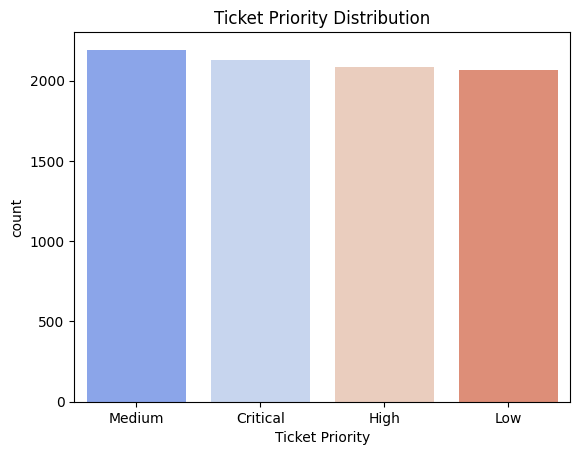

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index, palette='coolwarm')
plt.title('Ticket Priority Distribution')
plt.show()


In [32]:
label_cols = ['Customer Gender', 'Product Purchased', 'Ticket Priority', 'Ticket Channel']

# Filter only the label columns that still exist in df
label_cols = [col for col in label_cols if col in df.columns]

from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to the available label columns
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)  # use sparse=False instead of sparse_output

encoded_data = ohe.fit_transform(df[label_cols])
encoded_cols = ohe.get_feature_names_out(label_cols)

# Create encoded DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)

# Drop original label columns and merge encoded ones
df = df.drop(columns=label_cols)
df = pd.concat([df, encoded_df], axis=1)


In [33]:
df.head()

,Customer Age,Date of Purchase,Ticket Type,Ticket Status,Customer Satisfaction Rating,Response Delay,Customer Gender_Male,Customer Gender_Other,Product Purchased_Amazon Echo,Product Purchased_Amazon Kindle,...,Product Purchased_Sony PlayStation,Product Purchased_Sony Xperia,Product Purchased_Xbox,Product Purchased_iPhone,Ticket Priority_High,Ticket Priority_Low,Ticket Priority_Medium,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
0,32,2021-03-22,Technical issue,Pending Customer Response,3.0,19236.260000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,42,2021-05-22,Technical issue,Pending Customer Response,3.0,17776.760556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,48,2020-07-14,Technical issue,Closed,3.0,25259.243889,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,27,2020-11-13,Billing inquiry,Closed,3.0,22327.494444,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,67,2020-02-04,Billing inquiry,Closed,1.0,29112.211667,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Customer Age                                      8469 non-null   int64         
 1   Date of Purchase                                  8469 non-null   datetime64[ns]
 2   Ticket Type                                       8469 non-null   object        
 3   Ticket Status                                     8469 non-null   object        
 4   Customer Satisfaction Rating                      8469 non-null   float64       
 5   Response Delay                                    8469 non-null   float64       
 6   Customer Gender_Male                              8469 non-null   int32         
 7   Customer Gender_Other                             8469 non-null   int32         
 8   Product Purchased_Amazon Ech

In [35]:
# Checking data structure and summary statistics
print(df.info())         # Understand column types and non-null counts
print(df.describe())     # Basic statistics for numeric columns
print(df['Customer Satisfaction Rating'].value_counts())  # Distribution of the target variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Customer Age                                      8469 non-null   int64         
 1   Date of Purchase                                  8469 non-null   datetime64[ns]
 2   Ticket Type                                       8469 non-null   object        
 3   Ticket Status                                     8469 non-null   object        
 4   Customer Satisfaction Rating                      8469 non-null   float64       
 5   Response Delay                                    8469 non-null   float64       
 6   Customer Gender_Male                              8469 non-null   int32         
 7   Customer Gender_Other                             8469 non-null   int32         
 8   Product Purchased_Amazon Ech

In [36]:
df = pd.get_dummies(df, columns=['Ticket Type', 'Ticket Status'], drop_first=True)


In [37]:
X = df.drop(['Customer Satisfaction Rating', 'Date of Purchase'], axis=1)
y = df['Customer Satisfaction Rating'].astype(int)  # classification target


/tmp/ipython-input-38-3568998627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_counts.index.str.replace('Ticket Priority_', ''), y=priority_counts.values, palette='viridis')


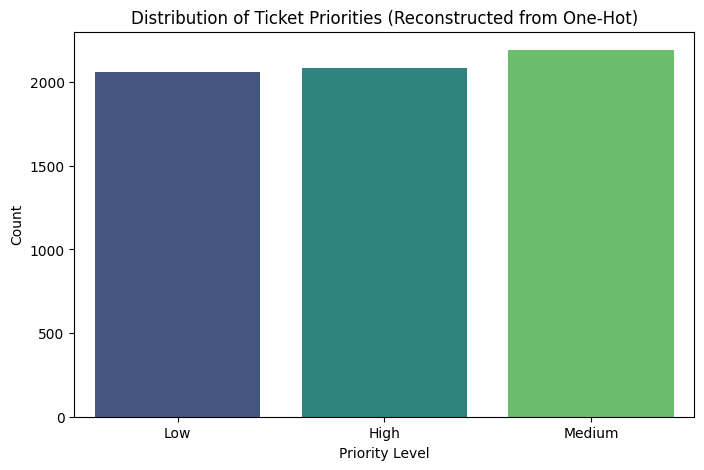

In [38]:
# Rebuild categorical from one-hot if needed
priority_cols = ['Ticket Priority_High', 'Ticket Priority_Low', 'Ticket Priority_Medium']
priority_counts = df[priority_cols].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=priority_counts.index.str.replace('Ticket Priority_', ''), y=priority_counts.values, palette='viridis')
plt.title("Distribution of Ticket Priorities (Reconstructed from One-Hot)")
plt.ylabel("Count")
plt.xlabel("Priority Level")
plt.show()


 2. Customer Satisfaction Rating Distribution

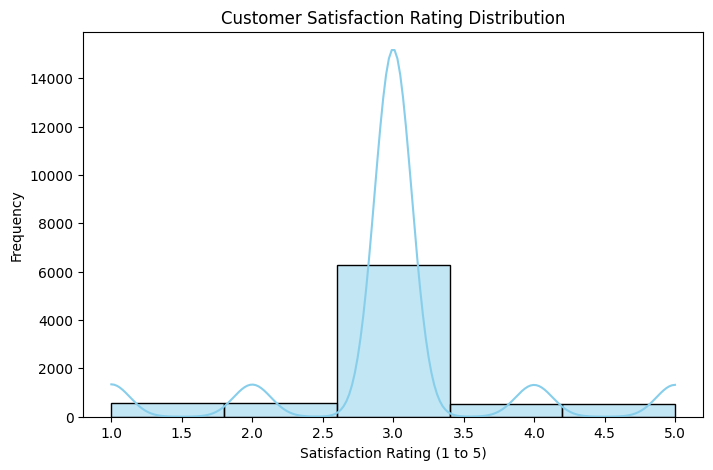

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Rating Distribution')
plt.xlabel('Satisfaction Rating (1 to 5)')
plt.ylabel('Frequency')
plt.show()


Purpose: See how many customers gave ratings from 1 to 5. This helps understand class imbalance for prediction.

3. Age Distribution

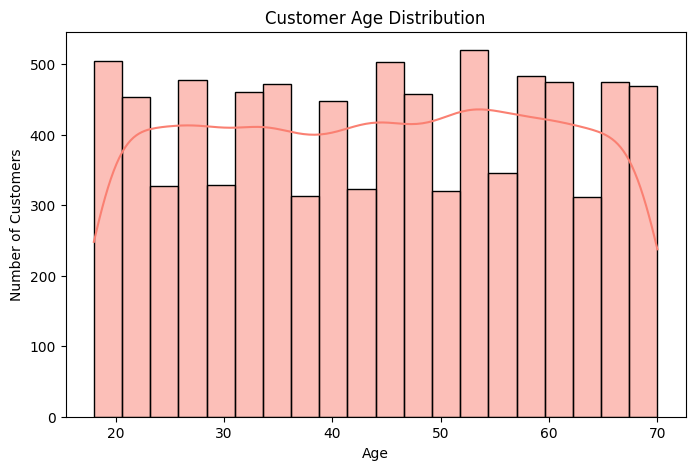

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


Purpose: Understand the age demographics of the customers.

 4. Gender Distribution

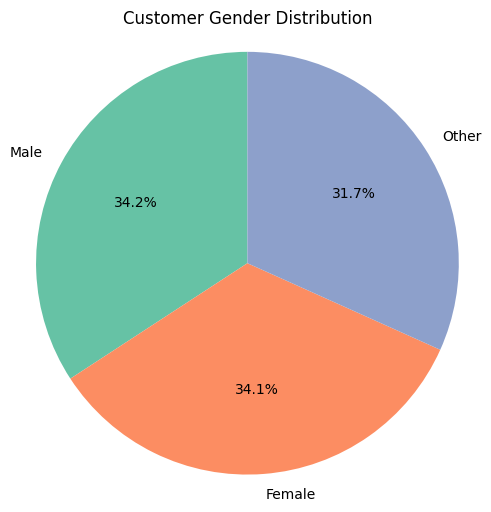

In [41]:
import numpy as np

# Reconstruct gender column
df['Customer Gender'] = np.select(
    [df['Customer Gender_Male'] == 1, df['Customer Gender_Other'] == 1],
    ['Male', 'Other'],
    default='Female'
)

# Now plot
gender_counts = df['Customer Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()



Visualize how gender is distributed across customers.

 5. Top Products Purchased

/tmp/ipython-input-42-1528280421.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


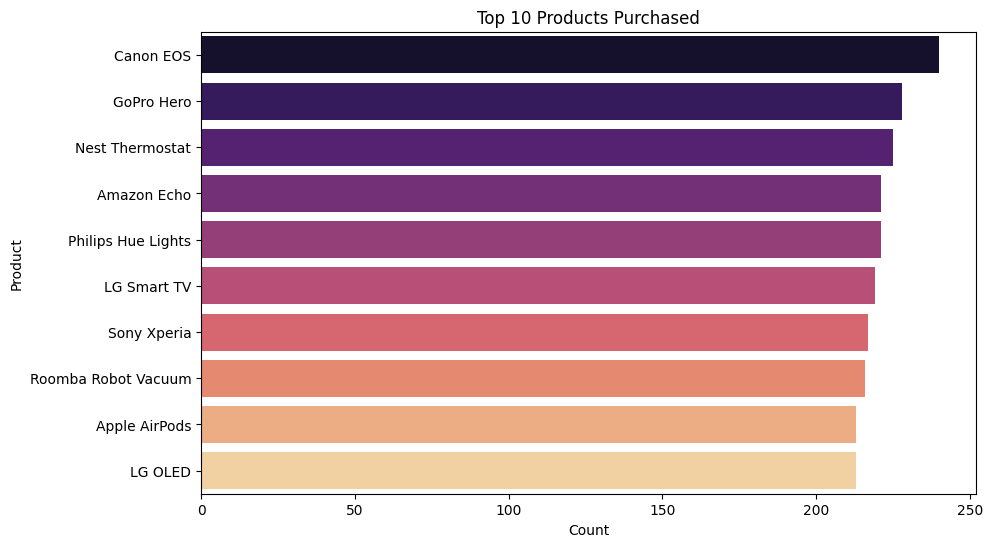

In [42]:
# Extract all one-hot encoded product columns
product_cols = [col for col in df.columns if col.startswith('Product Purchased_')]

# Sum each one-hot column to get counts
top_products = df[product_cols].sum().sort_values(ascending=False).head(10)

# Clean up column names
top_products.index = top_products.index.str.replace('Product Purchased_', '')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


Purpose: See which types of issues are most common (e.g., billing, technical, refund).

 7. Ticket Channel Distribution

/tmp/ipython-input-44-220665955.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='rocket')


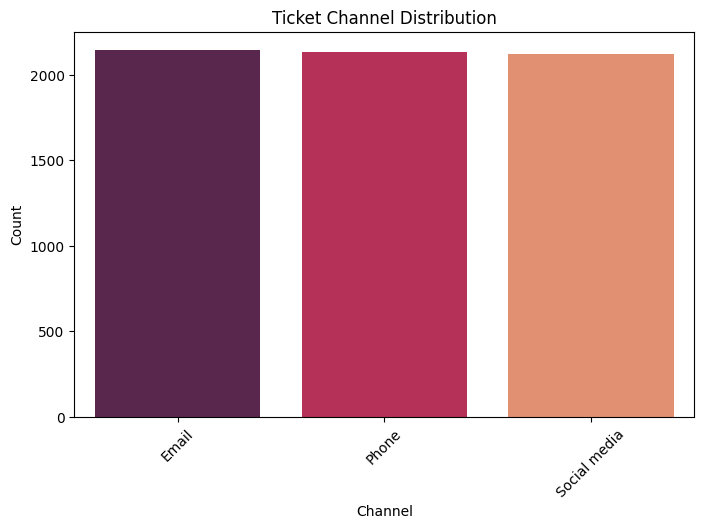

In [44]:
# Reconstruct 'Ticket Channel' from one-hot columns
channel_cols = [col for col in df.columns if col.startswith('Ticket Channel_')]
channel_counts = df[channel_cols].sum().sort_values(ascending=False)

# Clean labels
channel_counts.index = channel_counts.index.str.replace('Ticket Channel_', '')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to preserve class balance
)


In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.743801652892562

Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.25      0.25       111
           2       0.19      0.15      0.17       110
           3       0.88      0.95      0.91      1256
           4       0.21      0.16      0.18       108
           5       0.15      0.09      0.11       109

    accuracy                           0.74      1694
   macro avg       0.34      0.32      0.33      1694
weighted avg       0.71      0.74      0.72      1694


Confusion Matrix:
 [[  28   15   29   18   21]
 [  23   17   42   17   11]
 [  26   15 1188   16   11]
 [  20   14   42   17   15]
 [  13   29   43   14   10]]


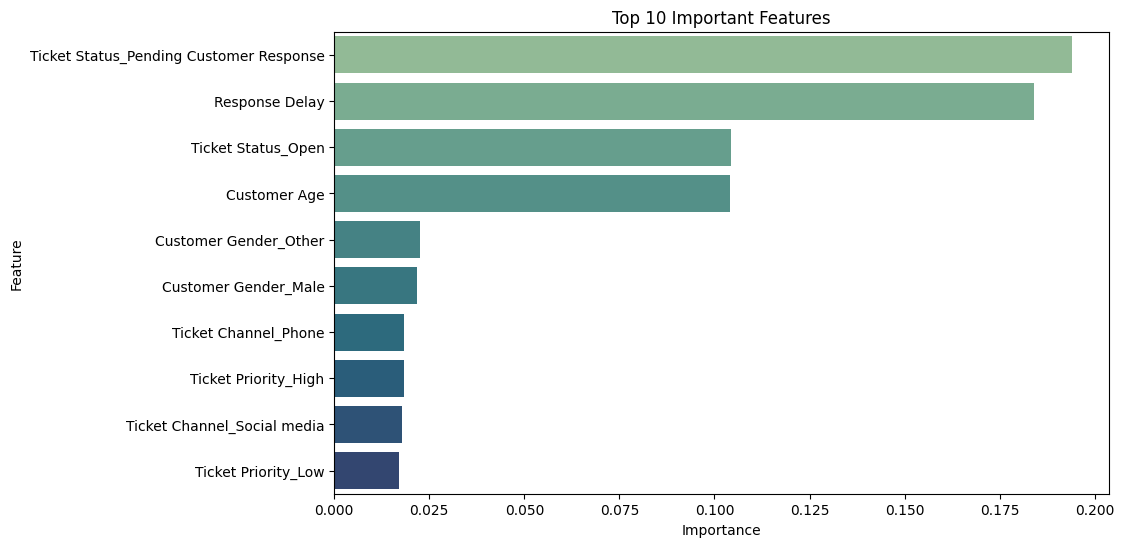

In [50]:
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='crest')
plt.title('Top 10 Important Features')
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nImproved Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Improved Accuracy: 0.7390791027154664

Improved Report:
               precision    recall  f1-score   support

           1       0.24      0.18      0.21       111
           2       0.13      0.09      0.11       110
           3       0.87      0.95      0.91      1256
           4       0.20      0.17      0.18       108
           5       0.14      0.09      0.11       109

    accuracy                           0.74      1694
   macro avg       0.32      0.30      0.30      1694
weighted avg       0.69      0.74      0.71      1694



In [61]:
import pickle
import os


# Save model
os.makedirs("model", exist_ok=True)
with open("satisfaction_model.pkl", "wb") as f:
    pickle.dump(model, f)
# Save feature names after preprocessing
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

